In [1]:
# Importar las librerías necesarias
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


## Aumento de datos y preprocesamiento para entrenamiento y validación

In [2]:
# Generador de imágenes con aumento de datos para entrenamiento y validación
aumento_datos = ImageDataGenerator(
    rescale=1./255,  # Normalización
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Usamos el 20% de las imágenes para validación
)

# Cargar el dataset desde el directorio (ajusta las rutas a tu estructura)
directorio_dataset = 'Dataset\EntrenamientoValidacion'

# Cargar los datos de entrenamiento con aumento de datos
entrenamiento_dataset = aumento_datos.flow_from_directory(
    directorio_dataset,
    target_size=(128, 128),  # Tamaño estándar de las imágenes
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Subconjunto de entrenamiento
)

# Cargar los datos de validación
validacion_dataset = aumento_datos.flow_from_directory(
    directorio_dataset,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Subconjunto de validación
)


Found 405 images belonging to 6 classes.
Found 99 images belonging to 6 classes.


## Aumento de datos y preprocesamiento para el conjunto de prueba

El conjunto de prueba no necesita aumento de datos, pero sí normalización.

In [7]:
# Generador de imágenes para el conjunto de prueba (sin aumento de datos, solo normalización)
generador_prueba = ImageDataGenerator(rescale=1./255)

# Cargar los datos de prueba
prueba_dataset = generador_prueba.flow_from_directory(
    'Dataset\Prueba',  # Ruta del dataset de prueba
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # No mezclar para poder comparar predicciones
)


Found 59 images belonging to 6 classes.


## Definir 3 arquitecturas distintas

Vamos a definir tres modelos CNN con diferentes arquitecturas para compararlos.

#### Arquitectura 1: Modelo simple con 2 capas convolucionales

In [8]:
# Arquitectura 1: Modelo simple
def crear_modelo_1():
    modelo = Sequential()
    modelo.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    modelo.add(MaxPooling2D(pool_size=(2, 2)))
    modelo.add(Conv2D(64, (3, 3), activation='relu'))
    modelo.add(MaxPooling2D(pool_size=(2, 2)))
    modelo.add(Flatten())
    modelo.add(Dense(128, activation='relu'))
    modelo.add(Dropout(0.5))
    modelo.add(Dense(6, activation='softmax'))
    
    modelo.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return modelo


#### Arquitectura 2: Modelo intermedio con 3 capas convolucionales

In [9]:
# Arquitectura 2: Modelo intermedio
def crear_modelo_2():
    modelo = Sequential()
    modelo.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    modelo.add(MaxPooling2D(pool_size=(2, 2)))
    modelo.add(Conv2D(64, (3, 3), activation='relu'))
    modelo.add(MaxPooling2D(pool_size=(2, 2)))
    modelo.add(Conv2D(128, (3, 3), activation='relu'))
    modelo.add(MaxPooling2D(pool_size=(2, 2)))
    modelo.add(Flatten())
    modelo.add(Dense(256, activation='relu'))
    modelo.add(Dropout(0.5))
    modelo.add(Dense(6, activation='softmax'))
    
    modelo.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return modelo


#### Arquitectura 3: Modelo avanzado con más capas y neuronas

In [10]:
# Arquitectura 3: Modelo avanzado
def crear_modelo_3():
    modelo = Sequential()
    modelo.add(Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    modelo.add(MaxPooling2D(pool_size=(2, 2)))
    modelo.add(Conv2D(128, (3, 3), activation='relu'))
    modelo.add(MaxPooling2D(pool_size=(2, 2)))
    modelo.add(Conv2D(256, (3, 3), activation='relu'))
    modelo.add(MaxPooling2D(pool_size=(2, 2)))
    modelo.add(Flatten())
    modelo.add(Dense(512, activation='relu'))
    modelo.add(Dropout(0.5))
    modelo.add(Dense(6, activation='softmax'))
    
    modelo.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return modelo


## Entrenar y evaluar cada modelo

#### Entrenamiento y evaluación del Modelo 1

In [11]:
# Entrenar el modelo 1
modelo_1 = crear_modelo_1()
historial_1 = modelo_1.fit(
    entrenamiento_dataset,
    steps_per_epoch=entrenamiento_dataset.samples // 32,
    epochs=10,
    validation_data=validacion_dataset,
    validation_steps=validacion_dataset.samples // 32
)

# Evaluar el modelo 1 en el conjunto de prueba
puntaje_prueba_1 = modelo_1.evaluate(prueba_dataset)
print(f"Precisión del Modelo 1 en el conjunto de prueba: {puntaje_prueba_1[1]*100:.2f}%")


c:\Users\julit\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


c:\Users\julit\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
c:\Users\julit\anaconda3\Lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 811ms/step - accuracy: 0.1936 - loss: 2.7295 - val_accuracy: 0.3021 - val_loss: 1.6621
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2812 - loss: 1.7098 - val_accuracy: 0.3333 - val_loss: 1.4434
Epoch 3/10


c:\Users\julit\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 687ms/step - accuracy: 0.4050 - loss: 1.5669 - val_accuracy: 0.5625 - val_loss: 1.2903
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4062 - loss: 1.3863 - val_accuracy: 0.3333 - val_loss: 1.5707
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 674ms/step - accuracy: 0.5954 - loss: 1.2151 - val_accuracy: 0.6667 - val_loss: 0.9629
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5000 - loss: 1.2372 - val_accuracy: 0.3333 - val_loss: 1.4417
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 690ms/step - accuracy: 0.6224 - loss: 1.0580 - val_accuracy: 0.6458 - val_loss: 0.9410
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5938 - loss: 1.1788 - val_accuracy: 0.3333 - val_loss: 1.3219
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 709ms/step - accuracy: 0.6493 - loss: 0.9722 - val_accuracy: 0.7188 - val_loss: 0.8663
Epoch 10/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6562 - loss: 0.9290 - val_accuracy: 1.0000 - val_lo

#### Entrenamiento y evaluación del Modelo 2

In [12]:
# Entrenar el modelo 2
modelo_2 = crear_modelo_2()
historial_2 = modelo_2.fit(
    entrenamiento_dataset,
    steps_per_epoch=entrenamiento_dataset.samples // 32,
    epochs=10,
    validation_data=validacion_dataset,
    validation_steps=validacion_dataset.samples // 32
)

# Evaluar el modelo 2 en el conjunto de prueba
puntaje_prueba_2 = modelo_2.evaluate(prueba_dataset)
print(f"Precisión del Modelo 2 en el conjunto de prueba: {puntaje_prueba_2[1]*100:.2f}%")


c:\Users\julit\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 794ms/step - accuracy: 0.2189 - loss: 2.2364 - val_accuracy: 0.2917 - val_loss: 1.6624
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1875 - loss: 1.7430 - val_accuracy: 0.6667 - val_loss: 1.6803
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 679ms/step - accuracy: 0.3548 - loss: 1.6214 - val_accuracy: 0.4688 - val_loss: 1.4251
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6250 - loss: 1.4801 - val_accuracy: 0.0000e+00 - val_loss: 1.5264
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 660ms/step - accuracy: 0.4503 - loss: 1.3635 - val_accuracy: 0.5833 - val_loss: 1.1624
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5000 - loss: 1.2311 - val_accuracy: 1.0000 - val_loss: 0.8658
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 631ms/step - accuracy: 0.6061 - loss: 1.1193 - val_accuracy: 0.6458 - val_loss: 0.9003
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5000 - loss: 1.0782 - val_accuracy: 0.

#### Entrenamiento y evaluación del Modelo 3

In [14]:
# Entrenar el modelo 3
modelo_3 = crear_modelo_3()
historial_3 = modelo_3.fit(
    entrenamiento_dataset,
    steps_per_epoch=entrenamiento_dataset.samples // 32,
    epochs=10,
    validation_data=validacion_dataset,
    validation_steps=validacion_dataset.samples // 32
)

# Evaluar el modelo 3 en el conjunto de prueba
puntaje_prueba_3 = modelo_3.evaluate(prueba_dataset)
print(f"Precisión del Modelo 3 en el conjunto de prueba: {puntaje_prueba_3[1]*100:.2f}%")


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.1829 - loss: 2.7167 - val_accuracy: 0.3229 - val_loss: 1.6707
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2381 - loss: 1.6757 - val_accuracy: 0.6667 - val_loss: 1.4986
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 903ms/step - accuracy: 0.3357 - loss: 1.5677 - val_accuracy: 0.6146 - val_loss: 1.2375
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4062 - loss: 1.3920 - val_accuracy: 0.6667 - val_loss: 1.1832
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 823ms/step - accuracy: 0.5672 - loss: 1.2105 - val_accuracy: 0.5729 - val_loss: 1.1866
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7500 - loss: 1.0354 - val_accuracy: 0.3333 - val_loss: 2.1113
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 863ms/step - accuracy: 0.6687 - loss: 0.9729 - val_accuracy: 0.6146 - val_loss: 1.0496
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6562 - loss: 0.9043 - val_accuracy: 0.3333 -

## Comparar resultados y justificar la selección del mejor modelo

In [15]:
# Comparar los resultados de las precisiones en el conjunto de prueba
print(f"Precisión del Modelo 1: {puntaje_prueba_1[1]*100:.2f}%")
print(f"Precisión del Modelo 2: {puntaje_prueba_2[1]*100:.2f}%")
print(f"Precisión del Modelo 3: {puntaje_prueba_3[1]*100:.2f}%")

# Selección del mejor modelo (dependiendo de los resultados)
if puntaje_prueba_1[1] > puntaje_prueba_2[1] and puntaje_prueba_1[1] > puntaje_prueba_3[1]:
    mejor_modelo = 'Modelo 1'
elif puntaje_prueba_2[1] > puntaje_prueba_1[1] and puntaje_prueba_2[1] > puntaje_prueba_3[1]:
    mejor_modelo = 'Modelo 2'
else:
    mejor_modelo = 'Modelo 3'

print(f"El mejor modelo es: {mejor_modelo}")


Precisión del Modelo 1: 79.66%
Precisión del Modelo 2: 83.05%
Precisión del Modelo 3: 71.19%
El mejor modelo es: Modelo 2


## Visualización de los resultados

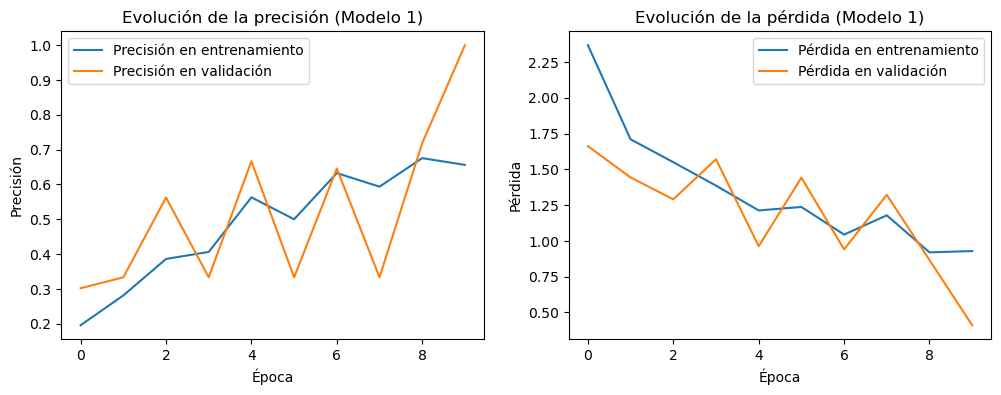

In [16]:
# Visualización de las curvas de precisión y pérdida del Modelo 1
plt.figure(figsize=(12, 4))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(historial_1.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(historial_1.history['val_accuracy'], label='Precisión en validación')
plt.title('Evolución de la precisión (Modelo 1)')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(historial_1.history['loss'], label='Pérdida en entrenamiento')
plt.plot(historial_1.history['val_loss'], label='Pérdida en validación')
plt.title('Evolución de la pérdida (Modelo 1)')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.show()


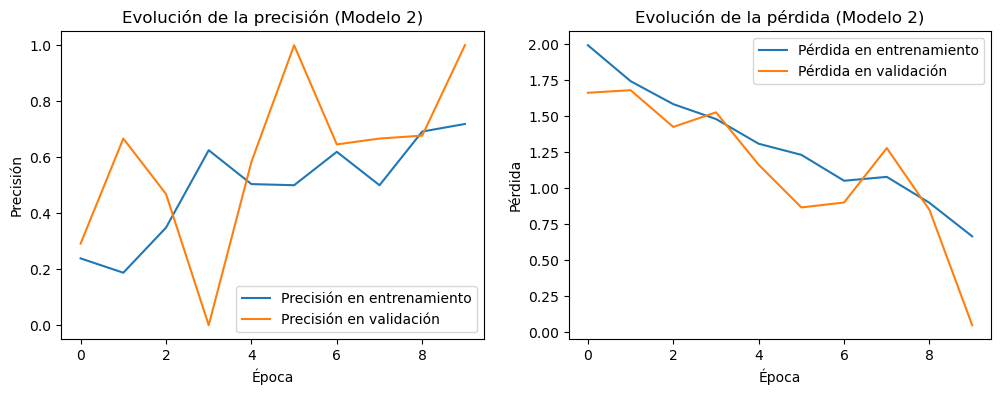

In [17]:
# Visualización de las curvas de precisión y pérdida del Modelo 2
plt.figure(figsize=(12, 4))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(historial_2.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(historial_2.history['val_accuracy'], label='Precisión en validación')
plt.title('Evolución de la precisión (Modelo 2)')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(historial_2.history['loss'], label='Pérdida en entrenamiento')
plt.plot(historial_2.history['val_loss'], label='Pérdida en validación')
plt.title('Evolución de la pérdida (Modelo 2)')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.show()


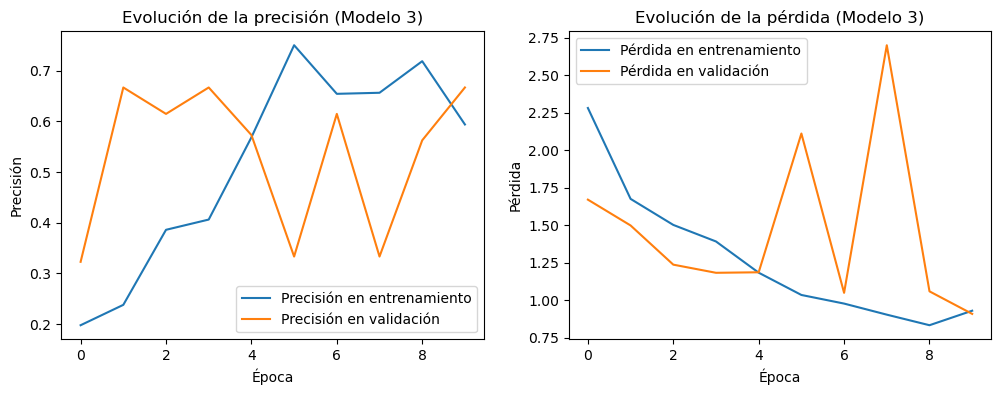

In [18]:
# Visualización de las curvas de precisión y pérdida del Modelo 3
plt.figure(figsize=(12, 4))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(historial_3.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(historial_3.history['val_accuracy'], label='Precisión en validación')
plt.title('Evolución de la precisión (Modelo 3)')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(historial_3.history['loss'], label='Pérdida en entrenamiento')
plt.plot(historial_3.history['val_loss'], label='Pérdida en validación')
plt.title('Evolución de la pérdida (Modelo 3)')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.show()
